# **Analisis Industri Pariwisata Perkemahan Selama Masa Pandemi Covid-19 di Jawa Barat**

In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from urllib.request import urlopen
from plotly.subplots import make_subplots

In [2]:
#Untuk melihat plot interactive, jangan running code ini!
import plotly.io as pio
pio.renderers.default = "png"

## **Persiapan Data**

Dataset yang digunakan:

| Nama Data | Sumber |
|-|-|
| Luas Lahan Perkemahan | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/luas-lahan-perkemahan-berdasarkan-kabupatenkota-di-jawa-barat-) |
| Jumlah Pengunjung Perkemahan | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/jumlah-pengunjung-perkemahan-berdasarkan-jenis-wisatawan-di-jawa-barat) |
| Jumlah Tenaga Kerja Perkemahan | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/jumlah-tenaga-kerja-perkemahan-berdasarkan-jenis-kelamin-di-jawa-barat) |
| Jumlah Perkemahan | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/jumlah-perkemahan-berdasarkan-kabupatenkota-di-jawa-barat) |
| Covid-19 | [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/perkembangan-harian-kasus-terkonfirmasi-positif-covid-19-berdasarkan-kabupatenkota-di-jawa-barat) |
| Vaksinasi | [Kementrian Kesehatan](https://vaksin.kemkes.go.id/#/provinces) |

**1. Data Luas Lahan Perkemahan**

In [3]:
dat1 = pd.read_csv('datasets/perkemahan_berdasarkan_luas_data.csv')
dat1.tail()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,luas_area,satuan,tahun
102,102,32,JAWA BARAT,3275,KOTA BEKASI,3.8,HEKTAR,2017
103,103,32,JAWA BARAT,3276,KOTA DEPOK,0.0,HEKTAR,2017
104,104,32,JAWA BARAT,3277,KOTA CIMAHI,0.0,HEKTAR,2017
105,105,32,JAWA BARAT,3278,KOTA TASIKMALAYA,368.0,HEKTAR,2017
106,106,32,JAWA BARAT,3279,KOTA BANJAR,0.0,HEKTAR,2017


**2. Data Jumlah Pengunjung Perkemahan**

In [4]:
dat2 = pd.read_csv('datasets/jml_pengunjung_perkemahan__jenis_wisatawan_data.csv')
dat2.tail()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
371,372,32,JAWA BARAT,3277,KOTA CIMAHI,NUSANTARA,275,ORANG,2020
372,373,32,JAWA BARAT,3278,KOTA TASIKMALAYA,MANCANEGARA,0,ORANG,2020
373,374,32,JAWA BARAT,3278,KOTA TASIKMALAYA,NUSANTARA,0,ORANG,2020
374,375,32,JAWA BARAT,3279,KOTA BANJAR,MANCANEGARA,0,ORANG,2020
375,376,32,JAWA BARAT,3279,KOTA BANJAR,NUSANTARA,0,ORANG,2020


**3. Data Jumlah Tenaga Kerja Perkemahan**

In [5]:
dat3 = pd.read_csv('datasets/jml_tk_perkemahan__jk_data.csv')
dat3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_tenaga_kerja,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,PRIA,15,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA,0,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PRIA,30,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,WANITA,7,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,PRIA,16,ORANG,2014


**4. Data Jumlah Perkemahan**

In [6]:
dat4 = pd.read_csv('datasets/jumlah_perkemahan_berdasarkan_kabupatenkota_data.csv')
dat4.tail()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_perkemahan,satuan,tahun
183,184,32,JAWA BARAT,3275,KOTA BEKASI,0,UNIT,2020
184,185,32,JAWA BARAT,3276,KOTA DEPOK,0,UNIT,2020
185,186,32,JAWA BARAT,3277,KOTA CIMAHI,1,UNIT,2020
186,187,32,JAWA BARAT,3278,KOTA TASIKMALAYA,1,UNIT,2020
187,188,32,JAWA BARAT,3279,KOTA BANJAR,0,UNIT,2020


## **Missing Values**

In [7]:
data = [dat1, dat2, dat3, dat3]
for i in data:
    print(i.isnull().sum(), '\n')

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
luas_area              0
satuan                 0
tahun                  0
dtype: int64 

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_wisatawan        0
jumlah_pengunjung      0
satuan                 0
tahun                  0
dtype: int64 

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_kelamin          0
jumlah_tenaga_kerja    0
satuan                 0
tahun                  0
dtype: int64 

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_kelamin          0
jumlah_tenaga_kerja    0
satuan                 0
tahun                  0
dtype: int64 



## **Mengambil Informasi Penting Dari Dataset**

* tahun
* kode_kabupaten_kota, 
* nama_kabupaten_kota,
* jumlah_perkemahan, 
* jumlah_tenaga_kerja (pria & wanita), dan;
* jumlah_pengunjung (nusantara & mancanegara). 

In [8]:
pekerja_pria = dat3[dat3.jenis_kelamin == 'PRIA']
pekerja_wanita = dat3[dat3.jenis_kelamin == 'WANITA']
wisatawan_nusantara = dat2[dat2.jenis_wisatawan == 'NUSANTARA']
wisatawan_mancanegara = dat2[dat2.jenis_wisatawan == 'MANCANEGARA']

In [9]:
df = dat4[['tahun', 'kode_kabupaten_kota', 'nama_kabupaten_kota', 'jumlah_perkemahan']].copy()
df['tenaga_kerja_pria'], df['tenaga_kerja_wanita'], df['jumlah_tenaga_kerja'] = np.zeros(len(df)), np.zeros(len(df)), np.zeros(len(df))
df['wisatawan_nusantara'], df['wisatawan_mancanegara'], df['jumlah_wisatawan'] = np.zeros(len(df)), np.zeros(len(df)), np.zeros(len(df))

In [10]:
data = [df, pekerja_pria, pekerja_wanita, wisatawan_nusantara, wisatawan_mancanegara]
for i in data:
    i.set_index(['tahun', 'kode_kabupaten_kota'], inplace=True)

In [11]:
indeks = df.index
for i in indeks:
    df.loc[i, 'tenaga_kerja_pria'] = pekerja_pria.loc[i, 'jumlah_tenaga_kerja']
    df.loc[i, 'tenaga_kerja_wanita'] = pekerja_wanita.loc[i, 'jumlah_tenaga_kerja']
    df.loc[i, 'wisatawan_nusantara'] = wisatawan_nusantara.loc[i, 'jumlah_pengunjung']
    df.loc[i, 'wisatawan_mancanegara'] = wisatawan_mancanegara.loc[i, 'jumlah_pengunjung']
    
df.reset_index(inplace=True)

In [12]:
df.groupby('tahun').sum().drop('kode_kabupaten_kota', axis=1)

,jumlah_perkemahan,tenaga_kerja_pria,tenaga_kerja_wanita,jumlah_tenaga_kerja,wisatawan_nusantara,wisatawan_mancanegara,jumlah_wisatawan
tahun,,,,,,,
2014,55,294.0,61.0,0.0,322721.0,3911.0,0.0
2015,54,292.0,61.0,0.0,322386.0,3911.0,0.0
2016,65,273.0,70.0,0.0,319588.0,5080.0,0.0
2017,68,284.0,78.0,0.0,392840.0,5072.0,0.0
2018,143,172.0,48.0,0.0,87010.0,1546.0,0.0
2019,145,321.0,96.0,0.0,255602.0,495.0,0.0
2020,165,44.0,150747.0,0.0,150747.0,44.0,0.0


## **Manipulasi Data**

Jumlah tenaga kerja wanita pada tahun 2020 memiliki nilai yang sangat jauh berbeda dengan tahun-tahun sebelumnya, tetapi nilainya serupa dengan jumlah wisatawan nusantara pada tahun 2020. Kemungkinan ada kesalahan dalam menginput dataset tersebut. Sehingga, kita harus memperbaiki nilai tersebut agar skala datanya sesuai dengan tahun sebelumnya.

In [13]:
pekerja_wanita_20 = df[df.tahun == 2020].tenaga_kerja_wanita.apply(lambda x: round(x/5e3))
for i in pekerja_wanita_20.index:
    df.loc[i, 'tenaga_kerja_wanita'] = pekerja_wanita_20[i]

Menghitung jumlah total kerja dan jumlah wisatawan

In [14]:
df.jumlah_tenaga_kerja = df.tenaga_kerja_pria + df.tenaga_kerja_wanita
df.jumlah_wisatawan = df.wisatawan_nusantara + df.wisatawan_mancanegara

In [15]:
df.groupby('tahun').sum().drop('kode_kabupaten_kota', axis=1)

,jumlah_perkemahan,tenaga_kerja_pria,tenaga_kerja_wanita,jumlah_tenaga_kerja,wisatawan_nusantara,wisatawan_mancanegara,jumlah_wisatawan
tahun,,,,,,,
2014,55,294.0,61.0,355.0,322721.0,3911.0,326632.0
2015,54,292.0,61.0,353.0,322386.0,3911.0,326297.0
2016,65,273.0,70.0,343.0,319588.0,5080.0,324668.0
2017,68,284.0,78.0,362.0,392840.0,5072.0,397912.0
2018,143,172.0,48.0,220.0,87010.0,1546.0,88556.0
2019,145,321.0,96.0,417.0,255602.0,495.0,256097.0
2020,165,44.0,31.0,75.0,150747.0,44.0,150791.0


# **Analisis Data Wisata Perkemahan**

In [16]:
luas_lahan = dat1.groupby('tahun').sum().reset_index()
luas_lahan = luas_lahan[['tahun', 'luas_area']]

df_by_year = df.groupby('tahun').sum().drop('kode_kabupaten_kota', axis=1)

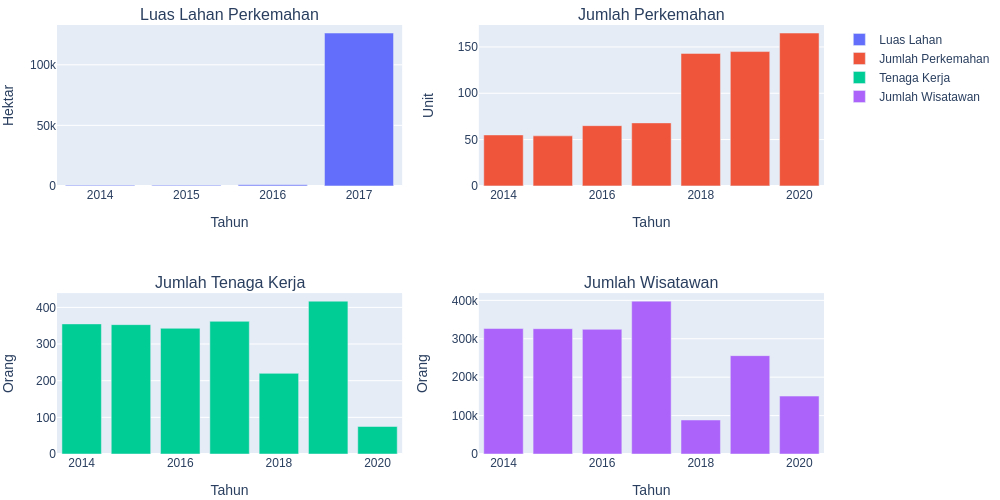

In [17]:
fig = make_subplots(rows=2, cols=2, shared_xaxes=False,
                    subplot_titles=('Luas Lahan Perkemahan',
                                    'Jumlah Perkemahan',
                                    'Jumlah Tenaga Kerja', 
                                    'Jumlah Wisatawan'))

fig.add_trace(go.Bar(x=luas_lahan.tahun, y=luas_lahan.luas_area, name='Luas Lahan'), 1, 1)
fig.add_trace(go.Bar(x=df_by_year.index, y=df_by_year.jumlah_perkemahan, name='Jumlah Perkemahan'), 1, 2)
fig.add_trace(go.Bar(x=df_by_year.index, y=df_by_year.jumlah_tenaga_kerja, name='Tenaga Kerja'), 2, 1)
fig.add_trace(go.Bar(x=df_by_year.index, y=df_by_year.jumlah_wisatawan, name='Jumlah Wisatawan'), 2, 2)

fig.update_xaxes(title_text="Tahun", row=1, col=1)
fig.update_xaxes(title_text="Tahun", row=1, col=2)
fig.update_xaxes(title_text="Tahun", row=2, col=1)
fig.update_xaxes(title_text="Tahun", row=2, col=2)
fig.update_yaxes(title_text="Hektar", row=1, col=1)
fig.update_yaxes(title_text="Unit", row=1, col=2)
fig.update_yaxes(title_text="Orang", row=2, col=1)
fig.update_yaxes(title_text="Orang", row=2, col=2)

fig.update_layout(margin={"r":5,"t":25,"l":5,"b":5},
                  width=100*10, height=100*5)

fig.show()

### **Tiga Wilayah yang memiliki lahan perkemahan paling luas**

In [18]:
dat1[dat1.tahun == 2017].sort_values('luas_area', ascending=False)[:3][['nama_kabupaten_kota', 'luas_area']].reset_index().drop('index', axis=1)

,nama_kabupaten_kota,luas_area
0,KABUPATEN TASIKMALAYA,125377.0
1,KOTA TASIKMALAYA,368.0
2,KABUPATEN KUNINGAN,148.9


## **Analisis Wisata Perkemahan Pada Masa Pandemi (2020)**

In [19]:
df_20 = df[df.tahun == 2020].reset_index().drop('index', axis=1)

### **Peta Sebaran Jumlah Perkemahan**

In [20]:
f = open('datasets/west_java.json')
west_java_map = json.load(f)
f.close()

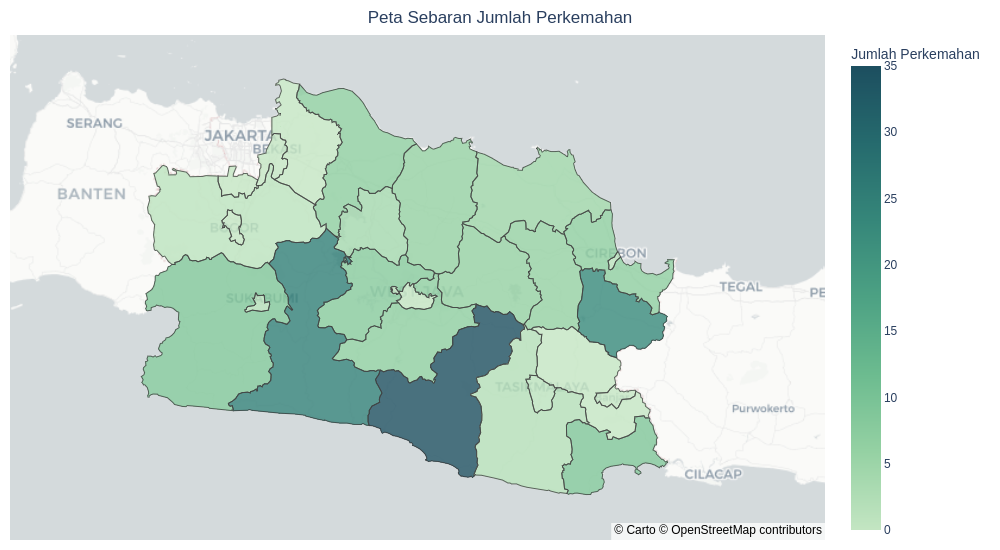

In [21]:
fig = px.choropleth_mapbox(df_20, geojson=west_java_map, locations='kode_kabupaten_kota',
                           color='jumlah_perkemahan',
                           color_continuous_scale="blugrn",
                           range_color=(0, int(df_20.jumlah_perkemahan.max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='nama_kabupaten_kota',
                           hover_data=['jumlah_perkemahan'],
                           labels={'kode_kabupaten_kota': 'Kode',
                                   'jumlah_perkemahan': 'Jumlah Perkemahan'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Jumlah Perkemahan',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

### **Peta Sebaran Jumlah Wisatawan**

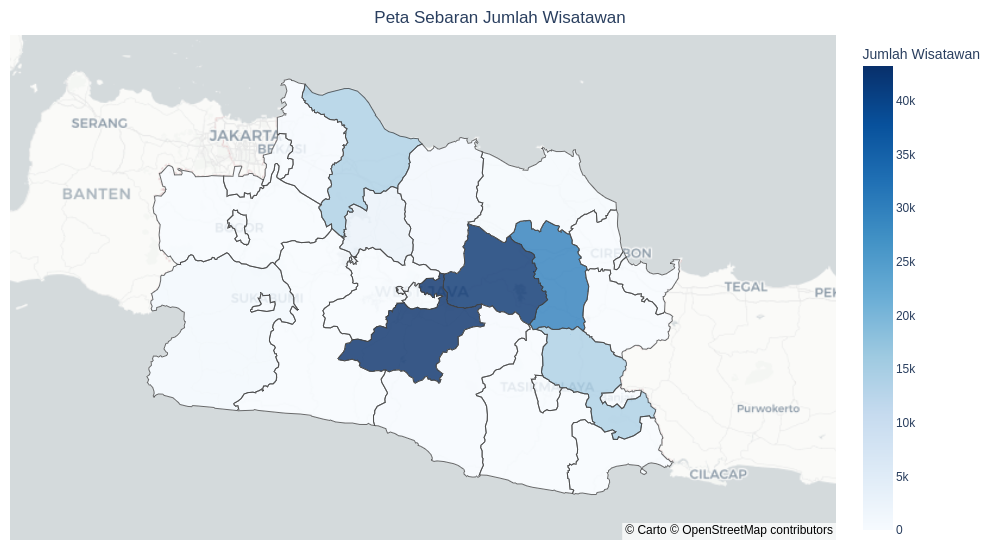

In [22]:
fig = px.choropleth_mapbox(df_20, geojson=west_java_map, locations='kode_kabupaten_kota',
                           color='jumlah_wisatawan',
                           color_continuous_scale="blues",
                           range_color=(0, int(df_20.jumlah_wisatawan.max())),
                           mapbox_style="carto-positron",
                           zoom=7.25, center = {"lat": -6.871893, "lon": 107.6455},
                           opacity=0.8,
                           hover_name='nama_kabupaten_kota',
                           hover_data=['jumlah_wisatawan'],
                           labels={'kode_kabupaten_kota': 'Kode',
                                   'jumlah_wisatawan': 'Jumlah Wisatawan'}
                           )
fig.update_layout(title={'text':'Peta Sebaran Jumlah Wisatawan',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":35,"l":10,"b":10},
                  width=100*10, height=100*5.5)
fig.show()

### **Persentase Tenaga Kerja**

In [23]:
jenis_pekerja = {'jenis_kelamin': ['Pria', 'Wanita'],
                 'jumlah': [df_20.tenaga_kerja_pria.sum(), df_20.tenaga_kerja_wanita.sum()]}
jenis_pekerja = pd.DataFrame(jenis_pekerja)

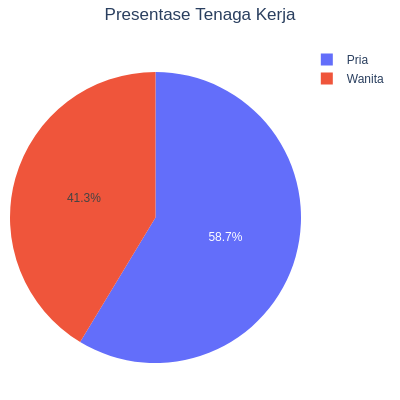

In [24]:
fig = go.Figure(data=[go.Pie(values=jenis_pekerja.jumlah, 
                             labels=jenis_pekerja.jenis_kelamin)])

fig.update_layout(title={'text':'Presentase Tenaga Kerja',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":45,"l":10,"b":10},
                  width=100*4, height=100*4)
fig.show()

### **Persentase Wisatawan**

In [25]:
jenis_wisatawan = {'jenis_wisatawan': ['Nusantara', 'Mancanegara'],
                 'jumlah': [df_20.wisatawan_nusantara.sum(), df_20.wisatawan_mancanegara.sum()]}
jenis_wisatawan = pd.DataFrame(jenis_wisatawan)

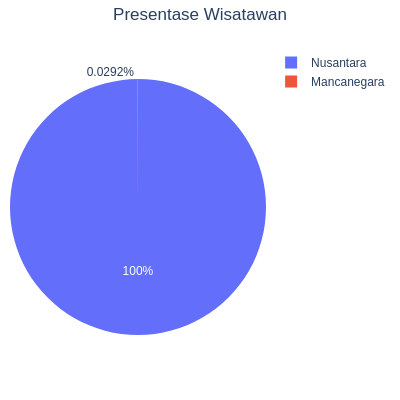

In [26]:
fig = go.Figure(data=[go.Pie(values=jenis_wisatawan.jumlah, 
                             labels=jenis_wisatawan.jenis_wisatawan)])

fig.update_layout(title={'text':'Presentase Wisatawan',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  margin={"r":10,"t":45,"l":10,"b":10},
                  width=100*4, height=100*4)
fig.show()

### **5 Wilayah Perkemahan Populer Oleh Wisatawan Nusantara**

Untuk mengetahui popularitas perkemahan dari suatu Kabupaten/Kota kita harus menghitungnya dengan menggunakan persamaan dibawah. Persamaan tersebut saya formulasikan dengan mempertimbangkan jumlah wisatawan, jumlah perkemahan dan rata-rata jumlah wisatawan.

$$\sigma = \sum_{i=1}^N \frac{|x_i - x_{mean}|}{x_i y_i + x_{mean}}$$

$$rate = \left( 1 - \frac{\sigma}{N} \right) \times 100$$

dengan:
* $N$ jumlah tahun (1, 2, 3 tahun)
* $i = 1,2,3 \dots N $
* $x_i$ adalah jumlah wisatawan tahun ke-i
* $y_i$ adalah jumlah perkemahan tahun ke-i
* $x_{mean}$ adalah rata-rata jumlah wisatawan
* $\sigma$ adalah bobot


Syarat batas:
* $x_{mean} \neq 0$ 
* $x_i \leq 1000 \rightarrow \sigma = 1$

In [27]:
rate_nus = df_20[['kode_kabupaten_kota', 'nama_kabupaten_kota']].copy()
rate_nus['rate'] = np.zeros(len(rate_nus))
rate_nus.set_index('nama_kabupaten_kota', inplace=True)

In [28]:
rate_cal = []
a = df.groupby(['nama_kabupaten_kota', 'tahun']).sum()[['wisatawan_nusantara', 'jumlah_perkemahan']].copy()
for i in rate_nus.index:
    c=0
    b = a.loc[i].copy()
    N = len(b)
    mean_wis = b.wisatawan_nusantara.mean()
    for j in b.index:
        wis_i = b.loc[j, 'wisatawan_nusantara']
        per_i = b.loc[j, 'jumlah_perkemahan']
        if wis_i <= 1000:
            k = 1
            c = k + c
        else:
            k = abs(wis_i - mean_wis)/(wis_i*per_i+mean_wis)
            c = k + c
    rate_cal.append(round((1-(c/N)), 2)*100)
rate_nus.rate = rate_cal

In [29]:
top5_wisnu = rate_nus.sort_values('rate', ascending=True)[-5:]

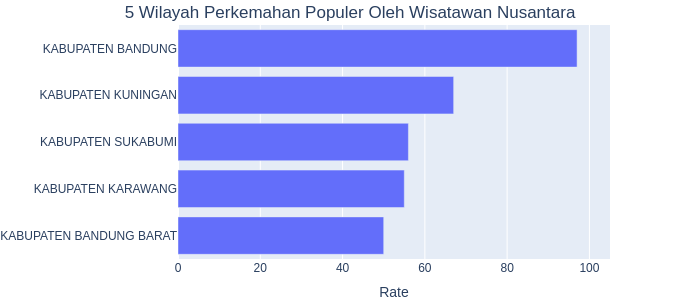

In [30]:
fig = go.Figure(data=[go.Bar(x=top5_wisnu.rate, 
                             y=top5_wisnu.index, 
                             orientation='h')])

fig.update_layout(title={'text':'5 Wilayah Perkemahan Populer Oleh Wisatawan Nusantara',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Rate',
                  xaxis_range = [0, 105],
                  margin={"r":90,"t":25,"l":0,"b":0},
                  width=100*7, height=100*3)

fig.show()

### **5 Wilayah Perkemahan Populer Oleh Wisatawan Mancanegara**

Untuk wilayah perkemahan populer oleh wisatawan mancanegara, perhitungan yang digunakan sama dengan yang di atas. Namun, untuk syarat batasnya berbeda yaitu untuk $x_i \leq 25 \rightarrow \sigma = 1$

In [31]:
rate_man = df_20[['kode_kabupaten_kota', 'nama_kabupaten_kota']].copy()
rate_man['rate'] = np.zeros(len(rate_man))
rate_man.set_index('nama_kabupaten_kota', inplace=True)

In [32]:
rate_cal = []
a = df.groupby(['nama_kabupaten_kota', 'tahun']).sum()[['wisatawan_mancanegara', 'jumlah_perkemahan']].copy()
for i in rate_man.index:
    c=0
    b = a.loc[i].copy()
    N = len(b)
    mean_wis = b.wisatawan_mancanegara.mean()
    for j in b.index:
        wis_i = b.loc[j, 'wisatawan_mancanegara']
        per_i = b.loc[j, 'jumlah_perkemahan']
        if wis_i <= 25:
            k = 1
            c = k + c
        else:
            k = abs(wis_i - mean_wis)/(wis_i*per_i+mean_wis)
            c = k + c
    rate_cal.append(round((1-(c/N)), 2)*100)
rate_man.rate = rate_cal

In [33]:
top5_wisma = rate_man.sort_values('rate', ascending=True)[-5:]

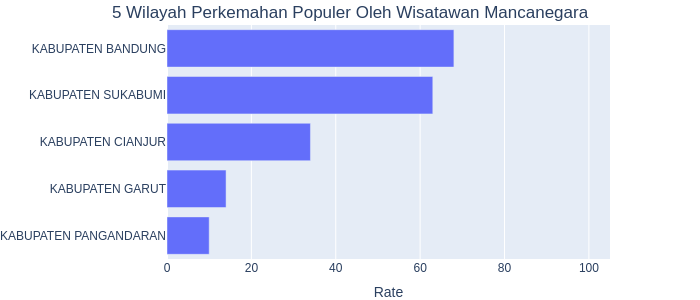

In [34]:
fig = go.Figure(data=[go.Bar(x=top5_wisma.rate, 
                             y=top5_wisma.index, 
                             orientation='h')])

fig.update_layout(title={'text':'5 Wilayah Perkemahan Populer Oleh Wisatawan Mancanegara',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Rate',
                  xaxis_range=[0, 105],
                  margin={"r":90,"t":25,"l":0,"b":0},
                  width=100*7, height=100*3)

fig.show()

# **Analisis Data Covid-19**

In [35]:
dat5 = pd.read_csv('datasets/covid-19.csv')
dat5.tail()

,tanggal,kode_kab_kota,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,konfirmasi_aktif_daily_growth,kota_kab_belum_teridentifikasi,sembuh_unidentified,meninggal_unidentified,id
18839,2022-01-02 00:00:00,3277,Kota Cimahi,12016.0,11630.0,178.0,208.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,18840
18840,2022-01-02 00:00:00,3274,Kota Cirebon,12840.0,12287.0,528.0,25.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,18841
18841,2022-01-02 00:00:00,3276,Kota Depok,105890.0,103700.0,2172.0,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,18842
18842,2022-01-02 00:00:00,3272,Kota Sukabumi,9262.0,8978.0,283.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,18843
18843,2022-01-02 00:00:00,3278,Kota Tasikmalaya,13907.0,13361.0,541.0,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,18844


Mengambil informasi penting dalam dataset

In [36]:
dat5 = dat5[['tanggal', 'kode_kab_kota', 'nama_kab_kota', 'konfirmasi_total_daily_growth', 
             'konfirmasi_aktif_daily_growth', 'konfirmasi_sembuh_daily_growth', 'konfirmasi_meninggal_daily_growth']]
dat5.drop(dat5.index[dat5['nama_kab_kota'] == 'jawa barat'], inplace=True)

In [37]:
dat5.isnull().sum()

tanggal                              0
kode_kab_kota                        0
nama_kab_kota                        0
konfirmasi_total_daily_growth        0
konfirmasi_aktif_daily_growth        0
konfirmasi_sembuh_daily_growth       0
konfirmasi_meninggal_daily_growth    0
dtype: int64

In [38]:
dat5.tanggal = pd.to_datetime(dat5.tanggal)
dat5.set_index('tanggal', inplace=True)
dat5.nama_kab_kota = dat5.nama_kab_kota.str.upper()
dat5.head()

,kode_kab_kota,nama_kab_kota,konfirmasi_total_daily_growth,konfirmasi_aktif_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth
tanggal,,,,,,
2020-03-01,3204,KABUPATEN BANDUNG,0.0,0.0,0.0,0.0
2020-03-01,3217,KABUPATEN BANDUNG BARAT,0.0,0.0,0.0,0.0
2020-03-01,3216,KABUPATEN BEKASI,0.0,0.0,0.0,0.0
2020-03-01,3201,KABUPATEN BOGOR,0.0,0.0,0.0,0.0
2020-03-01,3207,KABUPATEN CIAMIS,0.0,0.0,0.0,0.0


## **Pertumbuhan Covid-19 Setiap Bulan**

Mengambil dataset covid-19 dari tahun 2020-2021

In [39]:
covid19 = dat5[dat5.index.year.isin([2020, 2021])]
covid19_monthly = covid19.groupby(pd.Grouper(freq='m')).sum()

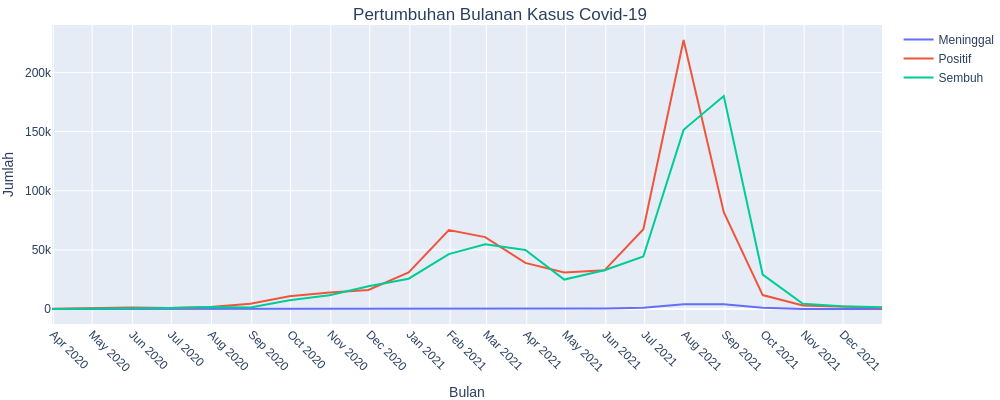

In [40]:
fig = go.Figure(data=[
            go.Scatter(x=covid19_monthly.index, 
                       y=covid19_monthly.konfirmasi_meninggal_daily_growth, 
                       name='Meninggal'),
            go.Scatter(x=covid19_monthly.index, 
                       y=covid19_monthly.konfirmasi_total_daily_growth, 
                       name='Positif'),
            go.Scatter(x=covid19_monthly.index, 
                       y=covid19_monthly.konfirmasi_sembuh_daily_growth, 
                       name='Sembuh')])

fig.update_xaxes(
        tickangle = 45,
        #ticklabelmode="period",
        dtick="M1")

fig.update_layout(title={'text':'Pertumbuhan Bulanan Kasus Covid-19',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Bulan',
                  yaxis_title='Jumlah',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*10, height=100*4)
fig.show()

# **Analisis Data Vaksinasi**

In [41]:
dat6 = pd.read_csv('datasets/Vaksinasi.csv')
dat6.tail()

/home/yustira/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (10,11,12,13,14,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



,Tanggal,Provinsi,Batch,Kab/kota,Kabupaten Kota,Kabupaten/Kota,Kategori,Prov,Region,tanggal terakhir,...,PersentaseLansiaVaksin1,PersentaseLansiaVaksin2,PersentasePublikVaksin1,PersentasePublikVaksin2,PersentaseRemajaVaksin1,PersentaseRemajaVaksin2,Persentasetahap3Vaksin1,Persentasetahap3Vaksin2,PersentaseTotalVaksin1Nasional,PersentaseTotalVaksin2
144819,9/2/2021,Jawa Barat,PETUGAS PUBLIK,Kota Bekasi,Bekasi,Bekasi,PEDAGANG PASAR,Jawa Barat,Jawa,False,...,0.000009,0.000009,0.000012,0.000012,0.000007,0.000007,1.416318e-06,1.416318e-06,0.00%,0.00%
144820,9/2/2021,Jawa Barat,PETUGAS PUBLIK,Kota Bogor,Bogor,Bogor,PEDAGANG PASAR,Jawa Barat,Jawa,False,...,0.000065,0.000005,0.000081,0.000006,0.000052,0.000004,9.914229e-06,7.081592e-07,0.00%,0.00%
144821,9/2/2021,Jawa Barat,PETUGAS PUBLIK,Kota Cimahi,Cimahi,Cimahi,PEDAGANG PASAR,Jawa Barat,Jawa,False,...,0.000005,0.000005,0.000006,0.000006,0.000004,0.000004,7.081592e-07,7.081592e-07,0.00%,0.00%
144822,9/2/2021,Jawa Barat,PETUGAS PUBLIK,Kota Depok,Depok,Depok,PEDAGANG PASAR,Jawa Barat,Jawa,False,...,0.000070,0.000005,0.000087,0.000006,0.000056,0.000004,1.062239e-05,7.081592e-07,0.00%,0.00%
144823,9/2/2021,Jawa Barat,PETUGAS PUBLIK,Kota Tasikmalaya,Tasikmalaya,Tasikmalaya,PEDAGANG PASAR,Jawa Barat,Jawa,False,...,0.000000,0.000009,0.000000,0.000012,0.000000,0.000007,0.000000e+00,1.416318e-06,0.00%,0.00%


In [42]:
vaccine = dat6[['Tanggal', 'Kab/kota', 'Kategori', 'Divaksin 1', 'Divaksin 2']].copy()
vaccine.Tanggal = pd.to_datetime(vaccine.Tanggal)
vaccine.set_index('Tanggal', inplace=True)

In [43]:
vaccine.isna().sum()

Kab/kota      0
Kategori      0
Divaksin 1    0
Divaksin 2    0
dtype: int64

In [44]:
# Mengubah format Nama Kab/kota menjadi uppercase dan sesuai dengan dataset perkemahan
a = vaccine.sort_values('Kab/kota', ascending=True)['Kab/kota'].unique()
b = covid19.sort_values('nama_kab_kota', ascending=True)['nama_kab_kota'].unique()

for i in range(len(a)):
    vaccine['Kab/kota'].replace({a[i]: b[i]}, inplace=True)

In [45]:
vaccine = vaccine[vaccine.index.year.isin([2021])]

## **Pertumbuhan Vaksinasi Setiap Bulan**

In [46]:
vaccine_monthly = vaccine.groupby([pd.Grouper(freq='m')]).sum()

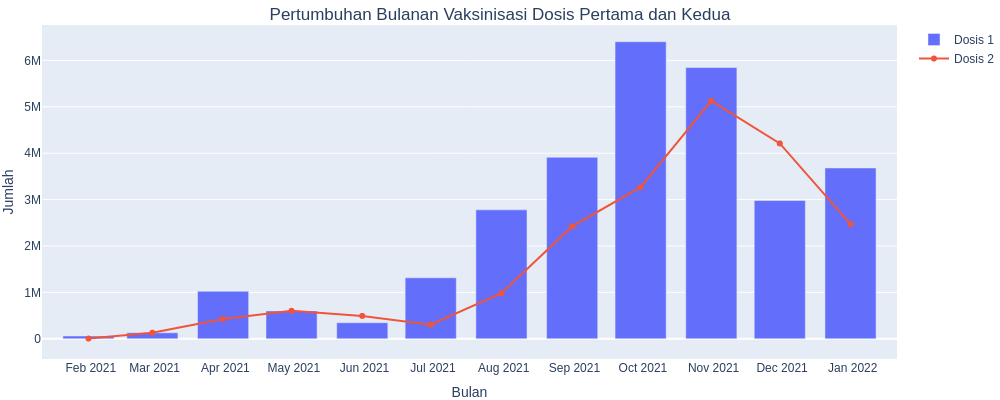

In [47]:
fig = go.Figure(data=[
            go.Bar(x=vaccine_monthly.index, 
                       y=vaccine_monthly['Divaksin 1'], 
                       name='Dosis 1'),
            go.Scatter(x=vaccine_monthly.index, 
                       y=vaccine_monthly['Divaksin 2'], 
                       name='Dosis 2')])

fig.update_xaxes(
        tickangle = 0,
        #ticklabelmode="period",
        dtick="M1")

fig.update_layout(title={'text':'Pertumbuhan Bulanan Vaksinisasi Dosis Pertama dan Kedua',
                         'y':0.98, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  xaxis_title='Bulan',
                  yaxis_title='Jumlah',
                  margin={"r":10,"t":25,"l":0,"b":0},
                  width=100*10, height=100*4)
fig.show()

Menyimpan data untuk pemodelan

In [48]:
data_train = df.drop(['tenaga_kerja_pria', 'tenaga_kerja_wanita', 'wisatawan_nusantara', 'wisatawan_mancanegara'], axis=1)
data_train.to_csv('datasets/Data_for_modeling.csv', index_label=False)

In [49]:
covid19.to_csv('datasets/covid19_for_modeling.csv')

In [50]:
vaccine.to_csv('datasets/vaccine_for_modeling.csv')